In [1]:
%matplotlib widget

import pandas as pd
import numpy as np

In [2]:
# Load in training data
df = pd.read_csv('videolectures.csv')


In [3]:
# Data preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Split feacture data and target class 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Create Train-Test split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

#Convert booleans to 0 and 1
y_train = y_train.astype(int)

X_train.set_index('id', inplace = True)
X_test.set_index('id', inplace = True)

#Normalise data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)


X_train_norm = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_scaled, columns = X_train.columns)


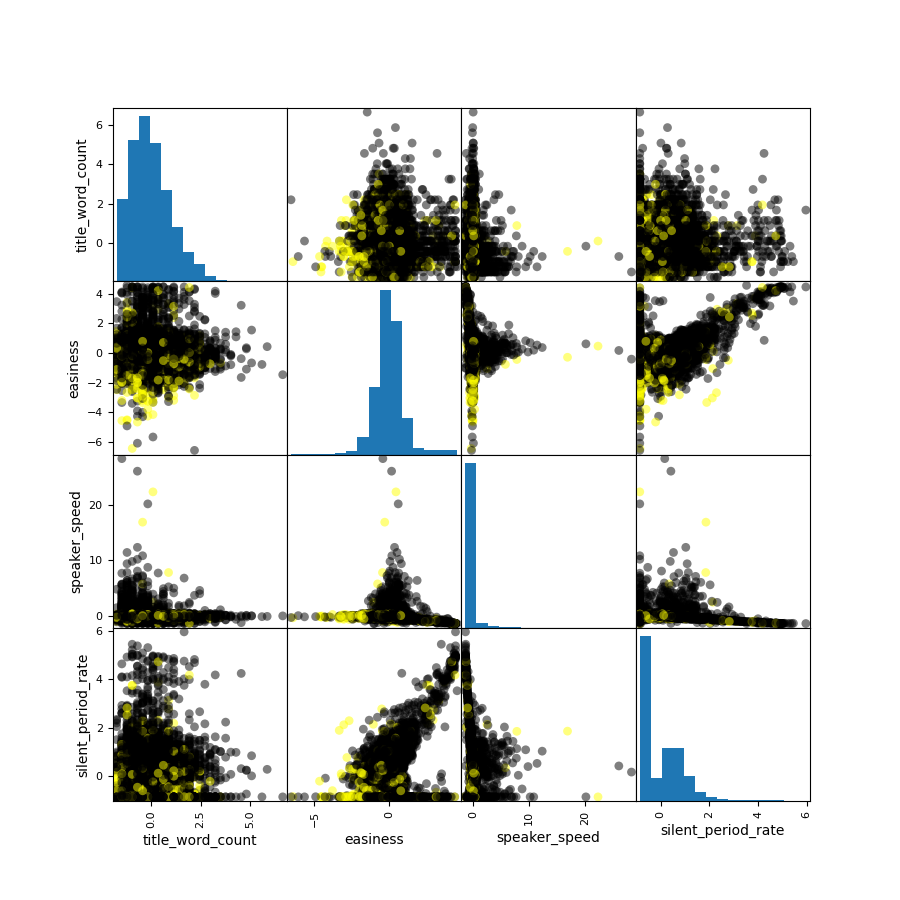

In [4]:
from matplotlib import cm

# Color map for class labels
cmap = cm.get_cmap('gnuplot')

# Plot scatter matrix
scatter = pd.plotting.scatter_matrix(X_train_norm[['title_word_count', 'easiness', 'speaker_speed', 'silent_period_rate']], c=y_train, marker='o', s=40, hist_kwds={'bins': 15}, figsize=(9, 9), cmap=cmap)

In [5]:
# Checking class imbalance
print("Ratio of target class false: ",len(y_train[y_train == 0])/len(y_train))

Ratio of target class false:  0.9043151969981238


In [6]:
# Training Logisitic regression
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Adjusting C to optimal value
model_lr = LogisticRegression(C=100, solver='liblinear', max_iter=100, class_weight=None).fit(X_train_norm,y_train)

y_predict_proba = model_lr.predict_proba(X_test_norm)[:, 1]
y_pred = model_lr.predict(X_test_norm)


Confusion Matrix:
[[2051   25]
 [ 179   55]]


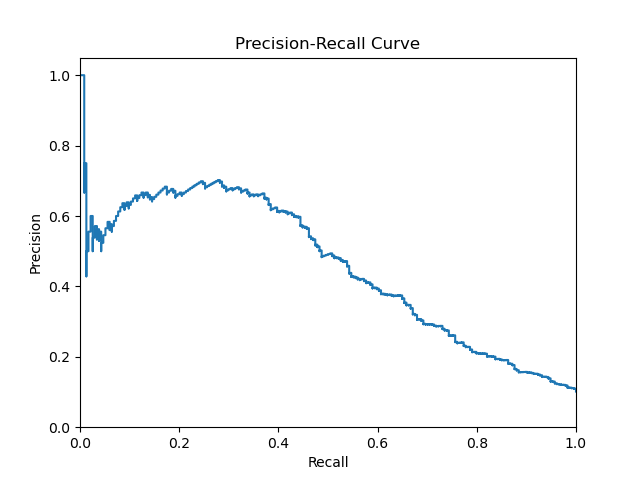

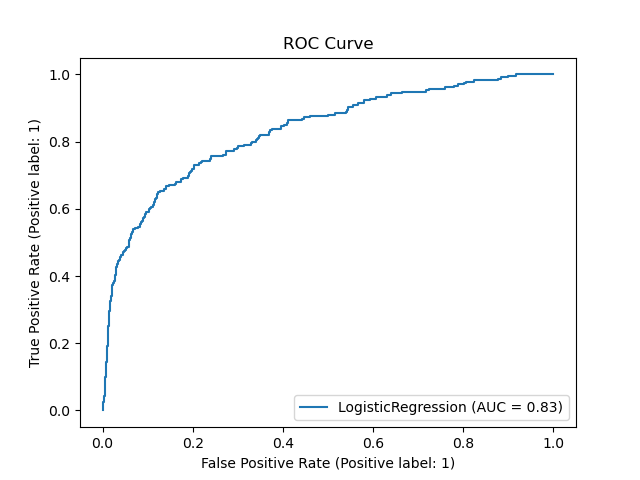

In [7]:
# Evaluation and Visualsiation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

AUC = roc_auc_score(y_test, y_predict_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_predict_proba)
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# ROC Curve
plot_roc_curve(model_lr, X_test_norm, y_test)
plt.title('ROC Curve')
plt.show()

